# Implementation of AdaBoost classifier

西瓜書p174

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn import tree
import numpy as np
 

In [2]:
dataset = load_breast_cancer()
T = 10

In [3]:
nd , nf = dataset.data.shape
D1 = np.array([1/float(nd)]*nd, dtype='float32')
print (nd , nf )

(569, 30)


In [4]:
dataset.target[dataset.target==0] = -1
np.unique(dataset.target)

array([-1,  1])

In [5]:
def cal_acc(y_true, y_pred):
    nd = y_true.shape[0]
    acc_matrix = (y_true == y_pred)
    n_acc = np.sum(acc_matrix) 
    acc_ratio = n_acc / float(nd)
    return acc_ratio, acc_matrix

In [6]:
Ds = []
Ds.append(D1)
hs = [] 
alphas = []
max_iter = 0

In [7]:
for t in range(T):
    print('classifier '+str(t))
    h = tree.DecisionTreeClassifier(max_depth=1).fit(dataset.data,dataset.target, sample_weight=Ds[-1])
    pred = h.predict(dataset.data) 
    acc_ratio, acc_matrix = cal_acc(dataset.target, pred)
    e =  1 - acc_ratio
    print('acc_ratio=',acc_ratio)
    if e > 0.5: break # e will be larger and larger
    max_iter+=1; hs.append(h)
    alpha = 0.5*np.log((1-e)/e); alphas.append(alpha) 
    print('alpha=',alpha)
    h_mul_f = np.ones_like(acc_matrix,dtype=int)
    h_mul_f[acc_matrix==0] = -1
    #print('np.unique(h_mul_f)=',np.unique(h_mul_f))
    D = Ds[-1]*np.exp(-alpha*h_mul_f)
    D = D/np.sum(D) ; Ds.append(D) 
    #print('np.sum(D)=',np.sum(D))
    print(' ')
       

classifier 0
('acc_ratio=', 0.9226713532513181)
('alpha=', 1.2396043143366813)
 
classifier 1
('acc_ratio=', 0.91564147627416526)
('alpha=', 1.1922745154227383)
 
classifier 2
('acc_ratio=', 0.68014059753954303)
('alpha=', 0.37720900297649312)
 
classifier 3
('acc_ratio=', 0.73286467486818985)
('alpha=', 0.50460285047626263)
 
classifier 4
('acc_ratio=', 0.87170474516695962)
('alpha=', 0.95805824278826834)
 
classifier 5
('acc_ratio=', 0.82073813708260102)
('alpha=', 0.76067822219231296)
 
classifier 6
('acc_ratio=', 0.55008787346221444)
('alpha=', 0.10051287303029546)
 
classifier 7
('acc_ratio=', 0.55008787346221444)
('alpha=', 0.10051287303029546)
 
classifier 8
('acc_ratio=', 0.55008787346221444)
('alpha=', 0.10051287303029546)
 
classifier 9
('acc_ratio=', 0.47627416520210897)


In [8]:
H = np.zeros_like(dataset.target, dtype='float32')
for t in range(max_iter):
    H += alphas[t]*hs[t].predict(dataset.data) 
    H_pred = np.sign(H)
    H_acc , _ = cal_acc(dataset.target, H_pred)
    print('After adding classifier '+str(t))
    print('total acc_ratio='+str(H_acc))
    print(' ')

After adding classifier 0
total acc_ratio=0.922671353251
 
After adding classifier 1
total acc_ratio=0.922671353251
 
After adding classifier 2
total acc_ratio=0.964850615114
 
After adding classifier 3
total acc_ratio=0.959578207381
 
After adding classifier 4
total acc_ratio=0.929701230228
 
After adding classifier 5
total acc_ratio=0.971880492091
 
After adding classifier 6
total acc_ratio=0.971880492091
 
After adding classifier 7
total acc_ratio=0.970123022847
 
After adding classifier 8
total acc_ratio=0.971880492091
 


In [9]:
import graphviz 

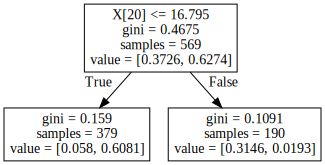

In [10]:
dot_data = tree.export_graphviz(hs[0], out_file=None) 
graph = graphviz.Source(dot_data)
graph

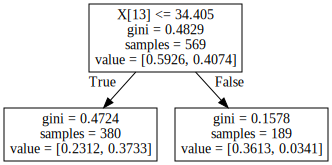

In [11]:
dot_data = tree.export_graphviz(hs[4], out_file=None) 
graph = graphviz.Source(dot_data)
graph

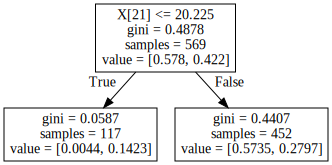

In [12]:
dot_data = tree.export_graphviz(hs[8], out_file=None) 
graph = graphviz.Source(dot_data)
graph